                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

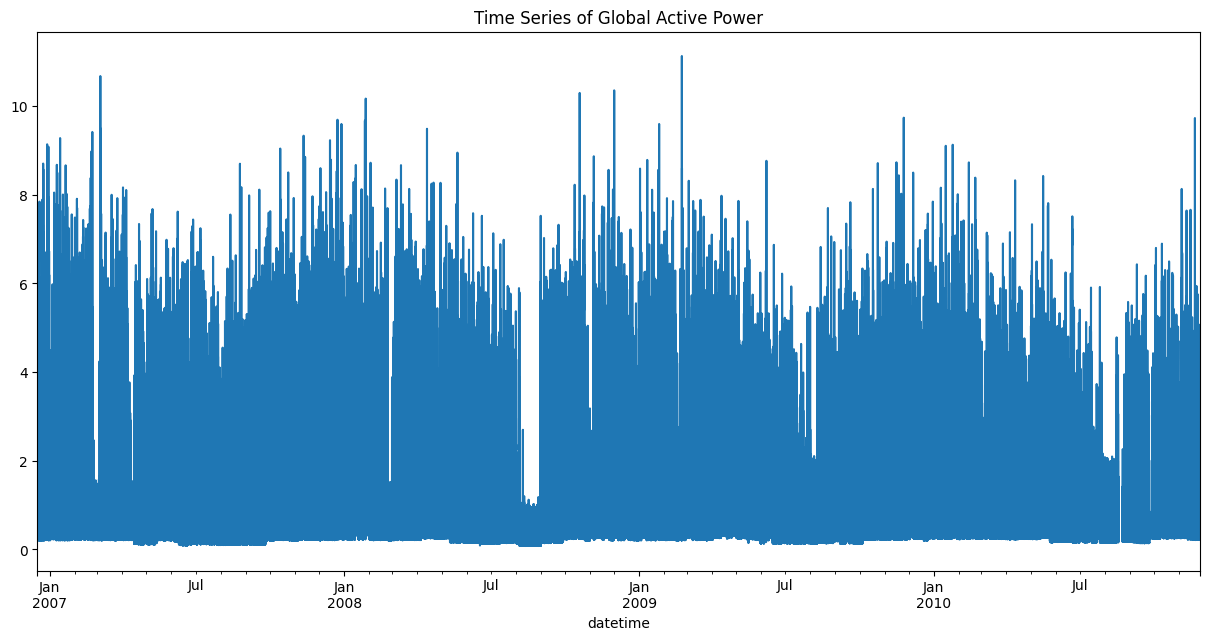

<ipython-input-6-93816813e3cb>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Global_active_power'].dropna())


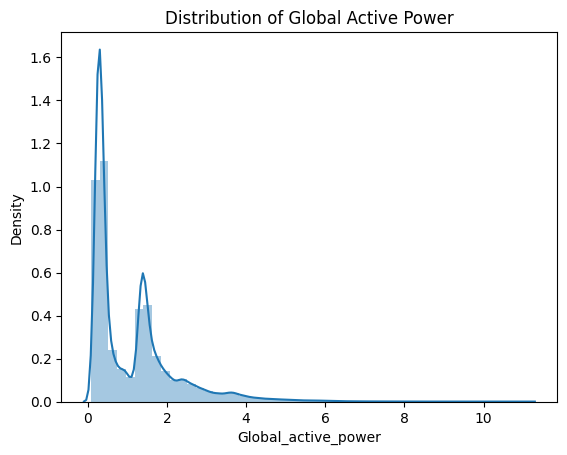

<ipython-input-6-93816813e3cb>:27: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2007']['Global_active_power'].plot(title='2007 Time Series of Global Active Power', figsize=(15, 7))


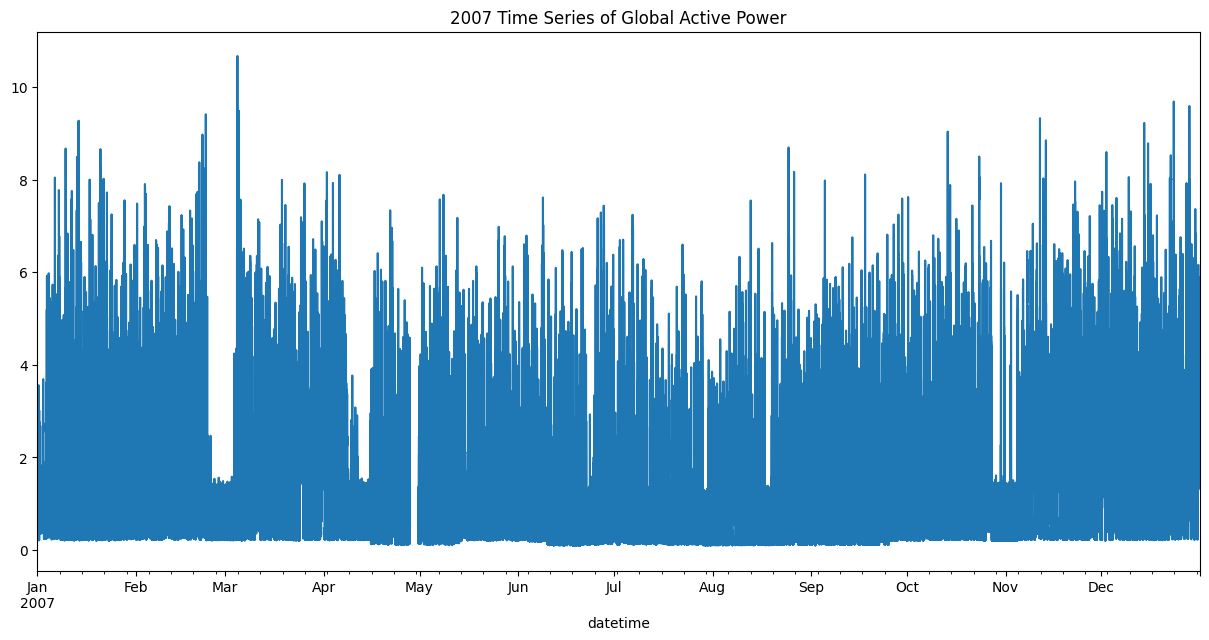

Mean Squared Error: 0.00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Load the dataset and perform initial examination
df = pd.read_csv("household_power_consumption.txt", delimiter=';',
                 parse_dates={'datetime':[0,1]}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='datetime')

print(df.head())

# 2. Exploratory Data Analysis with 5 visualizations

# Visualization 1: Time series plot of Global Active Power
df['Global_active_power'].plot(title='Time Series of Global Active Power', figsize=(15, 7))
plt.show()

# Visualization 2: Distribution of Global Active Power
sns.distplot(df['Global_active_power'].dropna())
plt.title('Distribution of Global Active Power')
plt.show()

# Visualization 3: Time series plot for a year (2007) of Global Active Power
df['2007']['Global_active_power'].plot(title='2007 Time Series of Global Active Power', figsize=(15, 7))
plt.show()


# 3. Preprocess the data
# For simplicity, let's fill missing values using forward fill
df.fillna(method='ffill', inplace=True)

# For modeling, let's predict 'Global_active_power' using other features from the previous hour.
df_shifted = df.shift(1)
df = pd.concat([df, df_shifted], axis=1)
df.dropna(inplace=True)
df.columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
              'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Prev_Global_active_power',
              'Prev_Global_reactive_power', 'Prev_Voltage', 'Prev_Global_intensity',
              'Prev_Sub_metering_1', 'Prev_Sub_metering_2', 'Prev_Sub_metering_3']

X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# 4. Build a model and make predictions
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
